# Finding the minimum of a function

## Local and global minimums

One of the most common problems in numerical analysis is to find the minimum of a multivariate function. To be precise, we are often mostly concerned with finding **a** minimum, not **the** minimum:

- **Global minimum**: a point in the domain of a function such that the function is smaller at that point than anywhere else in the domain:

$$
\bm{x} \text{ is a global minimum of } f(\bm{x})
\Leftrightarrow
\forall \bm{x}' \in \mathbb{R}^{n} \Rightarrow f(\bm{x}') \ge f(\bm{x})
$$

But try to always read Mathematics in more intuitive terms, like if you are trying to explain the concepts to yourself. In this case, it reads: 

<center>
"A point is a global minimum if it is the lowest point of the function, end of story. Of all possible pits in the function, it is the lowest."
</center>

- **Local minima**: points in the domain of a function such that there is a radius (usually really small) around it where the function only goes up. In math notation it looks like this:

$$
\bm{x} = (x_1, x_2, \cdots, x_n) \in \mathbb{R}^{n} \text{ is a local minimum of } f(\bm{x})
\Leftrightarrow
\exists \delta > 0 : \forall \bm{x}' \in \mathbb{R}^{n}, \|\bm{x}' - \bm{x}\| < \delta \Rightarrow f(\bm{x}') \ge f(\bm{x})
$$

And in intuitive terms:

<center>
"A local minimum is the bottom of a pit. The function may have many pits, each bottom is called a local minimum."
</center>

<center>
<img src="./minimum.png" width=30%>
</center>

## Finding a local minimum


There are several ways to look for a local minimum, which can be grouped as:

- Trial and error
- Analytic solutions
- Numerical optimization

### Trial and error

Just try several values of $\bm{x}$ to see which one has the smallest $f(\bm{x})$. No guarantees of finding a local minimum really, let alone it being a global minimum. But this is a real approach: systematic forms of this trial-and-error search exist with different names. For example: genetic search, particle swarm optimization, tabu search, simulated annealing, etc.

Lets do some exercises. (Exercises with no stars are easy. Exercises with $\star$ are not trivial but not too difficult. Exercises with $\star\star$ are harder. Exercises with $\star\star\star$ are cruel.)

**Exercise**: Consider the univariate (*i.e.* $\bm{x} \in \mathbb{R}$ is just a variable, not a list of them) function $f(x) = 2x^2 - 3x + 5$. 

1. Plot the function and find the minimum visually.

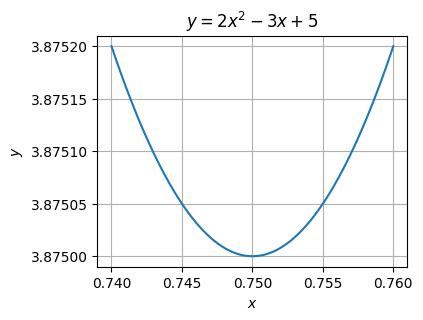

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.74, 0.76, 1001)
y = 2*x**2 - 3*x + 5

plt.figure(figsize=(4, 3))
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$y = 2x^2 - 3x + 5$')
plt.grid()
plt.show()

2. $\star$ Write a program to test $100$ random guesses for $x$ in the interval $[-5, 5]$ and compare with your visual guess for the minimum. Then test $10000$ random guesses and see if the precision increased.

In [2]:
def experimento(num_pontos):
    x = np.random.uniform(-5, 5, num_pontos) #Gera num_pontos valores aleatórios entre -5 e 5
    y = 2*x**2 - 3*x + 5

    index_min_y = np.argmin(y) #Acha o índice do menor valor de y
    x_min = x[index_min_y] #Acha o valor de x correspondente ao menor valor de y

    print(f'The minimum of y is {y[index_min_y]} at x = {x_min}')




In [3]:
num_points = 10_000
experimento(num_points)

The minimum of y is 3.875000002816142 at x = 0.7499624757267709


Looks like every $10 \times$ points we gain only one digit in accuracy... this method is really inefficient!

**Exercise**

The function $f(x, y) = \sin(y) \exp\left((1 - \cos(x))^2\right) + \cos(x) \exp\left((1 - \sin(y))^2\right) + (x - y)^2$ is quite curious, with many local minima, and it's called "Mishra's bird function". Here is a plot of it:

In [4]:
import numpy as np


def mishra_bird(x, y):
    return \
        np.sin(y) * np.exp((1 - np.cos(x))**2) \
        + np.cos(x) * np.exp((1 - np.sin(y))**2) \
        + (x - y)**2

In [5]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)

X, Y = np.meshgrid(x, y)

Z = mishra_bird(X, Y)

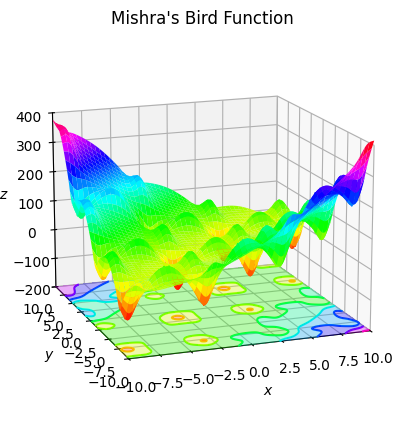

In [6]:
import matplotlib.pyplot as plt

cmap = 'hsv'

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cmap)
ax.contourf(X, Y, Z, zdir='z', offset=-200, cmap=cmap, alpha=0.3)
ax.contour(X, Y, Z, zdir='z', offset=-200, cmap=cmap)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Mishra\'s Bird Function')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-200, 400)
ax.view_init(15, 250)
plt.show()


How many local minima do you see in this $(-10, 10)^{2}$ domain?

Por volta de 7 minimos locais

**Exercise**

1. Suppose you have a function $f: [0, 1] \to \mathbb{R}$, that is, a function $f(x)$ of one variable and restricted to the domain $[0, 1]$. You want to find the **global** minimum of the function with precision $0.1$ in $x$, so you build a regular *grid* of points in the interval $[0, 1]$ and test each one. How many points you have to test?

Teria que testar 5 pontos, sendo eles [0.1, 0.3,0.5,0.7,0.9]

2. $\star$ Suppose you have a function $f:[0, 1]^{n} \to \mathbb{R}$, that is, a function $f(\bm{x}_1, \bm{x}_2, \cdots, \bm{x}_n)$ of $n$ variables, all restricted to the domain $[0, 1]$. You want to find the **global** minimum of the function with precision $0.1$ in each variable $\bm{x}_i$ by building a regular grid in the hypercube $[0, 1]^{n}$. How many points you have to test?

O número de pontos que você precisa testar é $5^n$.

3. $\star\star$ Although you achieve precision of $0.1$ in each coordinate in the previous exercise, you may still be very, very far from the minimum point! Why is that? Hint:

- Think of a line segment of length $0.1$, and the distance from the midpoint to the endpoints.
- Now think of a square of edge length $0.1$ and the distance from the midpoint to the corners.
- Now consider a cube of edge length $0.1$ and imagine the distance from the midpoint to the corners.
- Then make a formula for the distance of the midpoint to one of the corners in the general case of the hypercube of edge length $0.1$.

A fórmula é $0.1 \sqrt{n}$, sendo $n$ o número de dimensões do hipercubo

4. $\star\star\star$ The volume of a hypercube is computed the same way as the area of a square or the volume of a regular cube, it is just the edge length raised to the power of the dimension. Consider a hypercube of dimension $n$ and edge length one. How much of the volume of the hypercube is within a distance $\delta < 0.05$ from the walls?

Já que para calcularmos o volume de um hipercubo é a mesma forma que calculariamos de um cubo normal, o volume é a aresta elevada a potência da dimensão. Entretanto nesse caso o hipercubo está a uma distância de 0.05 de cada parede da aresta. Então seu volume é $0.9^n$

Esse problema está relacionado à otimização em alta dimensionalidade. Em problemas com muitas variáveis, a maior parte do volume em um espaço de alta dimensão (como um hipercubo) está concentrada nas bordas ou extremidades. Isso significa que, ao buscar mínimos globais em funções com várias variáveis, grande parte das soluções relevantes pode estar nas regiões próximas às paredes do hipercubo. Em alta dimensionalidade, essas regiões concentram a maior parte da "informação" ou soluções potenciais, tornando as extremidades do espaço de busca mais importantes do que o centro.

$\star\star\star$ **Exercise** The Mishra's bird function above does not change too fast apparently. Maybe we can find the global minimum with good precision using a smart approach: look for the global minimum in a grid of resolution $0.1$, then build a finer grid only around the candidate for global minimum. Find the minimum of the Mishra's bird function in the domain $[-10, 10]$ with resolution $0.001$.

In [7]:
import numpy as np

def mishra_minimum(x_low, x_high, y_low, y_high, res):
    x = np.arange(x_low, x_high, res)
    y = np.arange(y_low, y_high, res)

    X, Y = np.meshgrid(x, y)

    Z = mishra_bird(X, Y)
    idx = np.argmin(Z)

    x_min = X.flatten()[idx]
    y_min = Y.flatten()[idx]
    z_min = Z.flatten()[idx]

    return x_min, y_min, z_min

# Exemplo de uso:
x_min, y_min, z_min = mishra_minimum(-10, 10, -10, 10, 0.1)
print(f"The minimum of Mishra's Bird function is {z_min} at (x, y) = ({x_min}, {y_min})")


The minimum of Mishra's Bird function is -106.59441880296542 at (x, y) = (-3.1000000000000245, -1.6000000000000298)


### Deriving the value of the minimum using calculus

If the formula for $f(\bm{x})$ is known, and simple enough, one could try to find analytically the minima of it.

First, take the partial derivative of $f(\bm{x})$ with respect to each component of $\bm{x}$. The tuple of all partial derivatives is the *gradient* of $f(\bm{x})$:

$$
\nabla f(\bm{x}) = 
\begin{bmatrix}
\frac{\partial f}{\partial x_{1}}(\bm{x}) \\[10pt]
\frac{\partial f}{\partial x_{2}}(\bm{x}) \\[10pt]
\vdots \\[10pt]
\frac{\partial f}{\partial x_{n}}(\bm{x})
\end{bmatrix}
$$

Then set the gradient to the null vector $\overrightarrow{\bm{0}}$ and solve for $\bm{x}$:

$$
\nabla f(\bm{x}) = \overrightarrow{\bm{0}} 
\Leftrightarrow \left\{
\begin{matrix}
\frac{\partial f}{\partial x_{1}}(\bm{x}) = 0 \\[10pt]
\frac{\partial f}{\partial x_{2}}(\bm{x}) = 0 \\[10pt]
\vdots \\[10pt]
\frac{\partial f}{\partial x_{n}}(\bm{x}) = 0
\end{matrix}
\right.
$$

Solutions (yes, there may be more than one) to this system of equations will give you the "critical points" or "stationary points". It could be a minimum point, a maximum point, or "saddle point". In order to decide the nature of the solution, you need to consult the second derivative of $f(\bm{x})$. For a multivariate function, the first derivative is a vector (the gradient) and the second derivative is a *matrix*, called the *Hessian* matrix:

$$
\bm{H}_{f}(\bm{x}) = 
\begin{bmatrix}
\frac{\partial^{2} f}{\partial x_{1}^{2}}(\bm{x}) &
\frac{\partial^{2} f}{\partial x_{1} \partial x_{2}}(\bm{x}) &
\cdots &
\frac{\partial^{2} f}{\partial x_{1} \partial x_{n}}(\bm{x})\\[10pt]
\frac{\partial^{2} f}{\partial x_{2} \partial x_{1}}(\bm{x}) &
\frac{\partial^{2} f}{\partial x_{2}^{2}}(\bm{x}) &
\cdots &
\frac{\partial^{2} f}{\partial x_{2} \partial x_{n}}(\bm{x})\\[10pt]
\vdots & \vdots & \ddots & \vdots\\[10pt]
\frac{\partial^{2} f}{\partial x_{n} \partial x_{1}}(\bm{x}) &
\frac{\partial^{2} f}{\partial x_{n} \partial x_{2}}(\bm{x}) &
\cdots &
\frac{\partial^{2} f}{\partial x_{n}^{2}}(\bm{x})
\end{bmatrix}
$$

Note that the Hessian matrix is symmetric, because 
$\frac{\partial^{2} f}{\partial x_{i} \partial x_{j}}(\bm{x}) = 
\frac{\partial^{2} f}{\partial x_{j} \partial x_{i}}(\bm{x})$ (Clairaut's theorem).

Now take each one of your critical points $\bm{x}_{c}$ and compute the Hessian on it. And compute the eigenvalues $\lambda_{i}$, $i \in \{1, 2, \cdots, n\}$ of the Hessian $\bm{H}_{f}(\bm{x}_c)$. And finally check:

- If all eigenvalues are positive, $\bm{x}_{c}$ is a minimum.
- If all eigenvalues are negative, $\bm{x}_{c}$ is a maximum.
- If some eigenvalues are zero, and out of the remaining some are positive and some negative, then $\bm{x}_{c}$ is a saddle point.

This is all very complicated! But if this is useful, we must take a deep breath and face it...

So here is how the analytic derivative method relates to machine learning:

- Very few machine learning methods use the analytic derivative to find the optimal parameters of the model. The only one of which I'm aware is the *linear regression*.

- Some methods use the analytically derived gradient but do not solve the system of equations to find the minima analytically. Instead, they use an iterative method to start from a random estimate for the minimum (a point chosen at random) and update this estimate successively using the gradient: change the estimate by adding a fraction of the *negative* of the gradient to it, repeat until convergence. This is the *gradient descent* method, to be discussed in the next section.

- There is a way to obtain the numerical value of the gradient without having to determine the *formula* for the gradient, using a technique called ***automatic differentiation*** (or *autograd* for short). *This is the heart of ALL deep learning*, and there are several libraries to perform *autograd* efficiently and using advanced hardware, like GPUs or TPUs. For example: Tensorflow, Pytorch, Jax. The numerical gradient is then used with the *gradient descent* method to find a local minimum of the *loss function* (more on that later) with respect to the tunable parameters of the model.

### Numerical optimization

There are several methods for finding the numerical minimum of a function. One could have multiple courses on this topic, it is huge! Here is a book on it: Nocedal, J., & Wright, S. (n.d.). Numerical optimization (Second edition.). Springer-Verlag. 2006.

So lets focus on the most useful method for numerical optimization in machine learning: the *gradient descent* method. The idea is simple: start at a point at random, and go walking in the direction of strongest decrease of the function until you reach the (local) minimum.

In [11]:
def gradient_descent(f, g, x0, eta, tol):
    '''
    f: function to minimize
    g: gradient of f
    x0: initial guess
    eta: learning rate
    tol: tolerance for stopping criterion
    '''
    x = x0
    while True:
        grad = g(x)
        x = x - eta * np.array(grad)
        if np.linalg.norm(grad) < tol:
            break
    return x

Lets try this to find the minimum of $f(x) = 2x^2 - 3x + 5$:

In [8]:
def f(x):
    return 2.0*x**2 - 3.0*x + 5.0

def grad_f(x):
    return 4.0*x - 3.0

In [9]:
# A random number between -10 and 10.
x_0 = -10.0 + 20.0 * np.random.rand()

eta = 0.1

tol = 1e-6

In [12]:
x_min = gradient_descent(f, grad_f, x_0, eta, tol)

In [13]:
x_min

np.float64(0.7499998707160168)

**Exercise** Find a local minima of the mishra function starting from:

- $\bm{x}_{0} = (-3.0, -2.0)$
- $\bm{x}_{0} = (2.5, 5.0)$
- $\bm{x}_{0} = (-10.0, 10.0)$
- $\bm{x}_{0} = (10.0, -10.0)$

In [14]:
def mishra_bird_grad(x, y):
    dfdx = \
        2.0 * (x - y) \
        - np.sin(x) * (\
            np.exp((1.0 - np.sin(y))**2) \
            - 2.0 * np.exp((-1.0 + np.cos(x))**2) * (1 - np.cos(x)) * np.sin(y) \
        )
    dfdy = \
        np.cos(y) \
            * (np.exp((1.0 - np.cos(x))**2) - 2.0 * np.cos(x) * np.exp((np.sin(y) - 1.0)**2) * (1 - np.sin(y))) \
        - 2.0 *(x - y)
    return dfdx, dfdy

In [15]:
def find_mishra_minimum(x_0):
    eta = 1e-3
    tol = 1e-6
    return gradient_descent(
        lambda x: mishra_bird(x[0], x[1]),
        lambda x: mishra_bird_grad(x[0], x[1]),
        x_0,
        eta,
        tol,
    )

In [16]:
x_0 = np.array([-3.1, -1.5])
x_min = find_mishra_minimum(x_0)
print(x_min)

[-3.1302468  -1.58214218]


In [17]:
x_0 = np.array([2.5, 5.0])
x_min = find_mishra_minimum(x_0)
print(x_min)

[3.1529385  4.70104313]


In [19]:
x_0 = np.array([-10.0, 10.0])
x_min = find_mishra_minimum(x_0)
print(x_min)

[-9.267023   10.83781932]


In [20]:
x_0 = np.array([10.0, -10.0])
x_min = find_mishra_minimum(x_0)
print(x_min)

[ 9.29408584 -7.72328951]


**Exercise** The Rosenbrock function (https://en.wikipedia.org/wiki/Rosenbrock_function) is defined as:

$$f(x,y)=(a-x)^{2}+b(y-x^{2})^{2}$$

It has a global minimum at $(x,y) = (a,a^{2})$, where $f(x,y) = 0$.

**Exercise** Show that the global minimum is indeed at $(x,y) = (a,a^{2})$:

a) Using the gradient technique

b) Not using the gradient technique

a)
$−2(a−x)−4bx(x 
2
 −x 
2
 )=−2(a−x)=0$

b) $x = a$ and $y = x^2 = a^2$

Usually, these parameters are set such that $a = 1$ and $b = 100$. It is a function made especially to make life hard for the *gradient descent*.

In [21]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

In [22]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)

X, Y = np.meshgrid(x, y)

Z = rosenbrock(X, Y)

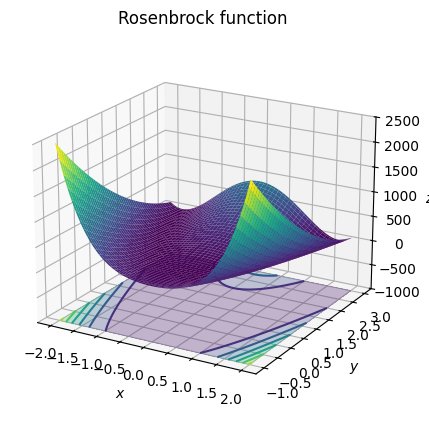

In [23]:
cmap = 'viridis'

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cmap)
ax.contourf(X, Y, Z, zdir='z', offset=-1000, cmap=cmap, alpha=0.3)
ax.contour(X, Y, Z, zdir='z', offset=-1000, cmap=cmap)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Rosenbrock function')
ax.set_zlim(-1000, 2500)
ax.view_init(20, -60)
plt.show()

**Exercise** Find a local minima of the rosenbrock function starting from:

- $\bm{x}_{0} = (0.1, 0.0)$
- $\bm{x}_{0} = (1.0, 4.0)$

In [24]:
def rosenbrock_grad(x, y):
    dfdx = -2 * (1 - x) - 400 * x * (y - x**2)
    dfdy = 200 * (y - x**2)
    return dfdx, dfdy

In [25]:
def find_rosenbrock_minimum(x_0):
    eta = 1e-3
    tol = 1e-6
    return gradient_descent(
        lambda x: rosenbrock(x[0], x[1]),
        lambda x: rosenbrock_grad(x[0], x[1]),
        x_0,
        eta,
        tol,
    )

In [26]:
x_0 = np.array([0.1, 0.0])
x_min = find_rosenbrock_minimum(x_0)
print(x_min)

[0.99999888 0.99999776]


In [27]:
x_0 = np.array([1.0, 4.0])
x_min = find_rosenbrock_minimum(x_0)
print(x_min)

[1.00000112 1.00000224]
